Proses
ERROR! Session/line number was not unique in database. History logging moved to new session 66


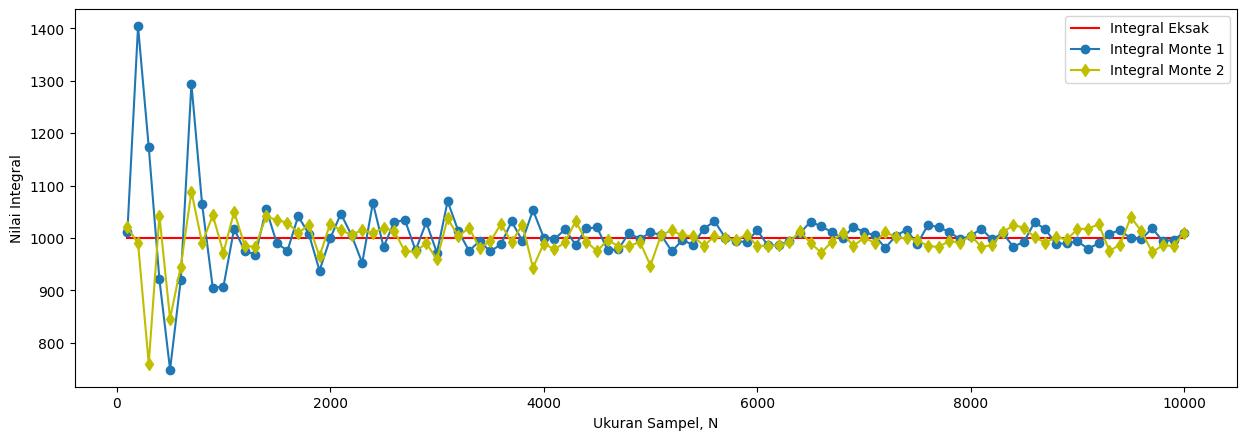

Done


In [169]:
from math import *
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

def integralEksak(f,a,b):
  return sc.integrate.quad(f,a,b)[0]

def average(x):
  return sum(x)/len(x)

def countVarians(f,ave):
  varians = 0
  for x in f:
    varians += (x - ave)**2
  return varians/len(f)

def MonteCarloAlgo1(f,a,b,N):
  if(N == 0):
    return 0
  x = np.random.uniform(a,b,N)
  f_x = f(x)
  f_ave = average(f_x)
  varians = countVarians(f_x,f_ave)
  varians_ave = varians/N
  k = np.random.normal(0,1)
  i = min((b - a) * (f_ave + (k *varians_ave)), (b - a) * (f_ave + (k *varians_ave)))
  return i

def countingQ(f_x,y):
  q = 0
  for i in range(len(f_x)):
    if(y[i] <= f_x[i]):
      q = q + 1
  return q

TIMESTAMP = 0.1

def findingMinF(f,a,b):
  x = np.arange(a, b + TIMESTAMP, TIMESTAMP)
  f_x = f(x)
  return min(f_x)

def findingMaxF(f,a,b):
  x = np.arange(a, b + TIMESTAMP, TIMESTAMP)
  f_x = f(x)
  return max(f_x)

def MonteCarloAlgo2(f,a,b,N):
  if(N == 0):
    return 0
  min_f = findingMinF(f,a,b)
  max_f = findingMaxF(f,a,b)
  x = np.random.uniform(a,b,N)
  f_x = f(x)
  y = np.random.uniform(min_f,max_f,N)
  Q = countingQ(f_x,y)
  return (Q/N)*(max_f - min_f)*(b-a)

TIME_N = 100
def PlotingIntegral(f,a,b,Nmax):
  print("Proses")
  # Generate Buffon Needle
  N = np.arange(TIME_N, Nmax+TIME_N, TIME_N)
  IntEks = []
  IntMonte1 = []
  IntMonte2 = []
  for i in N:
    IntEks.append(integralEksak(f,a,b))
    IntMonte1.append(MonteCarloAlgo1(f,a,b,int(i)))
    IntMonte2.append(MonteCarloAlgo2(f,a,b,int(i)))

  #Ploting Area
  plt.figure(figsize=(15,5), dpi=100)
  plt.ylabel("Nilai Integral")
  plt.xlabel("Ukuran Sampel, N")
  plt.plot(N, IntEks, 'r',label='Integral Eksak')
  plt.plot(N, IntMonte1, 'o',label='Integral Monte 1',linestyle='-')
  plt.plot(N, IntMonte2, 'dy',label='Integral Monte 2',linestyle='-')
  plt.legend()
  plt.show()
  print("Done")

a = 0 # edit ini untuk mengganti nilai a
b = 10  # edit ini untuk mengganti nilai b
n = 10000 # edit ini untuk mengganti nilai N maksimum
# edit ini untuk mengganti nilai fungsi f
f = lambda x : 0 + 0*x + 3*x**2
PlotingIntegral(f,a,b,n)